In [5]:
# Code borrowed from https://github.com/stephanie-wang/ownership-osdi20/blob/master/data/Video%20stabilization%20latency.ipynb

import numpy as np
import os

def load(filename):
    results = []
    num_over_1000 = 0
    max_frame = -1
    with open(filename, 'r') as f:
        for line in f.readlines():
            line = line.strip()
            frame, latency = line.split(' ')
            frame = int(frame)
            latency = float(latency)
            results.append((frame, latency))
            if frame > max_frame:
                max_frame = frame
#    if FAILURE:
    start = 0
    end = max_frame
#    else:
#        start = max_frame // 4
#        end = max_frame - start
    results = [latency for frame, latency in results if frame > start and frame < end]
    print(filename)
    print("\tmean", np.mean(results))
    print("\tp50:", np.percentile(results, 50))
    print("\tp90:", np.percentile(results, 90))
    print("\tp99:", np.percentile(results, 99))
    print("\tp100:", np.max(results))
    return results

In [7]:
filenames = ["app_keep_frames_timeline.txt", "app_lose_frames_timeline.txt", "checkpoint_timeline.txt"]
results = {}
for f in filenames:
    results[f] = load(f)

app_keep_frames_timeline.txt
	mean 4.697323528765834
	p50: 4.895294904708862
	p90: 11.838641309738158
	p99: 13.409708318710326
	p100: 13.588986158370972
app_lose_frames_timeline.txt
	mean 4.439278823047427
	p50: 4.437741041183472
	p90: 11.309900045394897
	p99: 12.898633308410645
	p100: 13.075313091278076
checkpoint_timeline.txt
	mean 0.11631838800120393
	p50: 0.012790679931640625
	p90: 0.4831135272979735
	p99: 1.2689057254791254
	p100: 1.3757390975952148


range(0, 20)
[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019]


<ipython-input-33-a0418da88a74>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color = next(plt.axes()._get_lines.prop_cycler)['color']
<ipython-input-33-a0418da88a74>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color = next(plt.axes()._get_lines.prop_cycler)['color']


<Figure size 432x288 with 0 Axes>

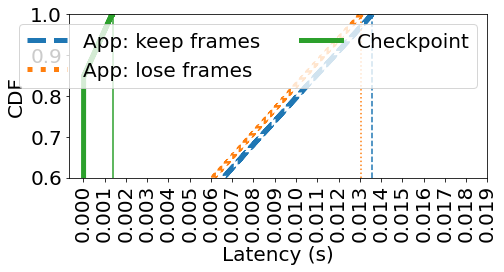

In [33]:
import matplotlib.pyplot as plt
from datetime import datetime

SAVE = True
FAILURE = True
DIR = "graphs"

font = {'size': 20}
plt.rc('font', **font)
plt.tight_layout()


index = 0
plt.figure(figsize=(7.5, 3))

def plot(curve, label, linestyle):
    global index
    color = next(plt.axes()._get_lines.prop_cycler)['color']
    n = np.arange(1,len(curve)+1) / np.float(len(curve))
    h, = plt.step(np.sort(curve), n, label=label, linewidth=5, linestyle=linestyle, color=color)
    plt.axvline(max(curve), linestyle=linestyle, color=color)
    index += 1
    return h


if FAILURE:
    curves = [
        (results["app_keep_frames_timeline.txt"], "App: keep frames", 'dashed'),
        (results["app_lose_frames_timeline.txt"], "App: lose frames", 'dotted'),
        (results["checkpoint_timeline.txt"], "Checkpoint", 'solid'),
 #       (ownership_failure, "O; WF", 'dotted'),
 #       (ownership_checkpoint, "O+CP", 'solid'),
 #       (ownership, "O", 'dotted'),
    ]
    legend_order = [
        0, 1, 2,
#        0, 3, 5, 2, 4, 1,
    ]
    handles = [None for _ in curves]
    labels = [None for _ in curves]
    for i, curve in enumerate(curves):
        curve, label, linestyle = curve
        curve = [p / 1000 for p in curve]
        handles[legend_order[i]] = plot(curve, label, linestyle)
        labels[legend_order[i]] = label
    plt.xlabel("Latency (s)")
    plt.ylabel("CDF")
    name = "latency-failure.pdf"
    plt.ylim()
else:
#     plot(ownership_checkpoint, "Ownership+cp (n=72)", 'solid')
#     plot(ownership_20, "Ownership (n=20)", 'solid')
    plot(ray_0_7, "Leases (n=60)", 'dashed')
    plot(centralized, "Centralized (n=72)", 'dotted')
    plot(ownership, "Ownership (n=72)", 'solid')

    plt.xlabel("Latency (ms)")
    plt.ylabel("CDF")
    name = "latency.pdf"
    

if FAILURE:
    plt.ylim(0.6, 1)
    plt.legend(handles, labels, ncol=2, loc='upper right')
    r = range(0, 20, 1)
    print(r)
    print([i/1000.0 for i in r])
    plt.xticks([i/1000.0 for i in r], ["{:.3f}".format(i/1000.0) for i in r], rotation='vertical')
#    plt.xlim(-1)
else:
    plt.xlim(0)
    plt.ylim(0, 1)
    plt.yticks([0.00, 0.50, 1.00])
    plt.legend()
    r = range(0, 1, 0.1)
    plt.xticks(r, [str(i) if i % 1000 == 0 else '' for i in r])
# plt.xscale('log')
# plt.tick_params(which='both', axis='x', length=3)


#plt.tight_layout()

if SAVE:
    plt.savefig(os.path.join(DIR, name))
else:
    plt.show()